## Loan Prediction Project
### Author: André Rizzo
### May 2019


### 1. Defining the problem
The main purpose of the project is to verify if person can or cannot take a loan based on a series of previously collected informations.
This is a typical machine learning problem, supervised learning category and classification group of algorithms.

In [1]:
import numpy as np
import scipy.stats as stat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### 2. Data Collection
A CSV file will be used for training purpose.

In [2]:
df = pd.read_csv("/ML/Loan_prediction/data/raw/train.csv")  # Load dataframe from file

### 3. Data Exploration

### *3.1 - Variable Identification*

In [3]:
df.head(10) # Show the first ten rows from dataframe.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.tail(10) # Show the last ten rows from dataframe.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 321.1 KB


#### *Predictive Features*
- **Loan_ID :** Unique Loan ID
    - *Categorical feature*
- **Gender :**  Male/Female
    - *Categorical feature*
- **Married :** Applicant married (Y/N)
    - *Categorical feature*
- **Dependents :** Number of dependents
    - *Numerical / Discrete feature*
- **Education :** Applicant Education (Graduate/Under Graduate)
    - *Categorical feature*
- **Self_Employed :** Self employed (Y/N)
    - *Categorical feature*
- **ApplicantIncome :** Applicant income
    - *Numerical / Continuous feature*
- **CoapplicantIncome :** Coapplicant income
    - *Numerical / Continuous feature*
- **LoanAmount :** Loan amount in thousands
    - *Numerical / Continuous feature*
- **Loan_Amount_Term :** Term of loan in months
    - *Numerical / Discrete feature*
- **Credit_History :** Credit history meets guidelines
    - *Numerical / Discrete feature*
- **Property_Area :** Urban/Semi Urban/Rural
    - *Categorical feature*

#### *Response Feature*
- **Loan_Status :** Loan approved (Y/N)
    - *Categorical feature*

### *3.2 - Preliminary Missing Values Treatment*

#### *3.2.1 - Detection*

In [6]:
mv = df.isnull().sum()/614
print("Missing Values Proportions")
print(mv)

Missing Values Proportions
Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


Observation:
Almost all features have missing values. At this stage MVs will be removed in order to make univariate and bivariate analysis. On the following steps missing values will be treated with more details.

#### *3.2.2 - Mitigation*

In [13]:
df_without_NA = df.dropna()
df_without_NA.isnull().sum()/614

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

Observation: As we can see, all NaN were removed.

### *3.3 - Univariate Analysis*

### *3.3.1 - Numerical features (Continuous)*

ApplicantIncome Feature

Position Measures
-----------------------
Mean : 5364.23
Median : 3859.00
Minimum : 150.00
Maximum : 81000.00

Dispersion Measures
-----------------------
Range : 80850.00
25th quantile: 2898.75
75th quantile: 5852.50
IQR : 2953.75
Variance : 32062136.67
Standard dev : 5662.34
-----------------------
Skewness : 6.8954
Kurtosis : 73.2814


CoapplicantIncome Feature

Position Measures
-----------------------
Mean : 1581.09
Median : 1084.50
Minimum : 0.00
Maximum : 33837.00

Dispersion Measures
-----------------------
Range : 33837.00
25th quantile: 0.00
75th quantile: 2253.25
IQR : 2253.25
Variance : 6838037.15
Standard dev : 2614.96
-----------------------
Skewness : 5.8632
Kurtosis : 57.0467


LoanAmount Feature

Position Measures
-----------------------
Mean : 144.74
Median : 128.00
Minimum : 9.00
Maximum : 600.00

Dispersion Measures
-----------------------
Range : 591.00
25th quantile: 100.00
75th quantile: 170.00
IQR : 70.00
Variance : 6468.06
Standard dev 

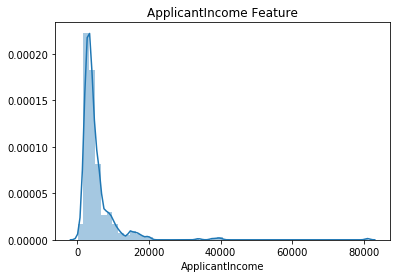

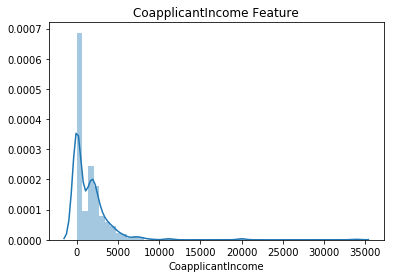

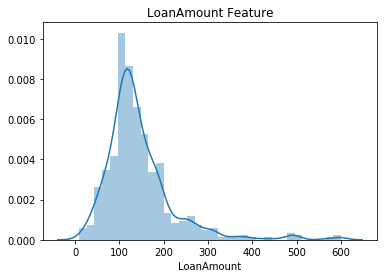

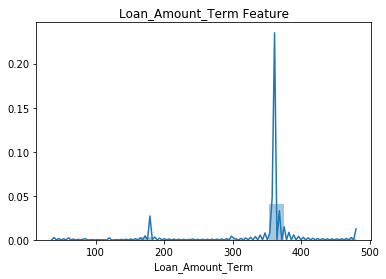

In [15]:
continuous_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
for var in continuous_features:
    print("=============================")
    print(var,"Feature")
    print("=============================")
    print("")
    print("Position Measures")
    print("-----------------------")
    print("Mean : %.2f" % df_without_NA[var].mean())
    print("Median : %.2f" % df_without_NA[var].median())
    print("Minimum : %.2f" % df_without_NA[var].min())
    print("Maximum : %.2f" % df_without_NA[var].max())
    print("")
    print("Dispersion Measures")
    print("-----------------------")
    print("Range : %.2f" % (df_without_NA[var].max() - df_without_NA[var].min()))
    print("25th quantile: %.2f" % np.quantile(df_without_NA[var],0.25))
    print("75th quantile: %.2f" % np.quantile(df_without_NA[var],0.75))
    print("IQR : %.2f" % stat.iqr(df_without_NA[var]))
    print("Variance : %.2f" % np.var(df_without_NA[var]))
    print("Standard dev : %.2f" % np.std(df_without_NA[var]))
    print("-----------------------")
    print("Skewness : %.4f" % stat.skew(df_without_NA[var]))
    print("Kurtosis : %.4f" % stat.kurtosis(df_without_NA[var]))
    print("")
    plt.figure()
    sns.distplot(df_without_NA[var])
    #sns.boxplot(df[var])
    title = plt.gca()
    title.set_title(var + " Feature")
    print("")
    

### *3.3.2 - Numerical features (Discrete)*

# Check missing values

In [ ]:
# Computing the number of NaN in dataframe BEFORE imputation
# is.null(): Detect missing values (NaN in numeric arrays, None/NaN in object arrays)
df.isnull().sum()

In [ ]:
# Treat missing values of CATEGORICAL features

# Categorical variables
for feature in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[feature].fillna(df[feature].mode()[0], inplace=True)


If there are 

In [ ]:
# Treat missing values of NUMERICAL features

# Numerical variables
for feature in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df[feature].fillna(df[feature].median(), inplace=True)

In [ ]:
# Check if the imputation was successfull 
df.isnull().sum()

## Quantitative Variables Analysis

In [ ]:
df.describe()

In [ ]:
# Check the distribution skewness 
# Skewness: is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
# The skewness value can be positive or negative, or undefined.
# For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, 
# and positive skew indicates that the tail is on the right
df.skew()

### ApplicantIncome Feature

In [ ]:
sns.distplot(df['ApplicantIncome'])

### CoapplicantIncome Feature

In [ ]:
sns.distplot(df['CoapplicantIncome'])

### LoanAmount Feature

In [ ]:
sns.distplot(df['LoanAmount'])

### Loan_Amount_Term Feature

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

### Credit_History Feature

In [ ]:
sns.countplot(x='Credit_History', data= df)

## Qualitative Variables Analysis

### Gender Feature

In [ ]:
sns.countplot(x='Gender', data= df)
plt.title('Gender Feature')

### Married Feature

In [ ]:
sns.countplot(x='Married', data= df)
plt.title('Married Feature')

### Dependents Feature

In [ ]:
sns.countplot(x='Dependents', data= df, )
plt.title('Dependents Feature')

### Education Feature

In [ ]:
sns.countplot(x='Education', data= df, )
plt.title('Education Feature')

### Self-Employed Feature

In [ ]:
sns.countplot(x='Self_Employed', data= df, )
plt.title('Self_Employed Feature')

### Property_Area Feature

In [ ]:
sns.countplot(x='Property_Area', data= df, )
plt.title('Property_Area Feature')

### Loan_Status Feature

In [ ]:
sns.countplot(x='Loan_Status', data= df, )
plt.title('Loan_Status Feature')

## Bivariate Analysis

In [ ]:
qvn = ['Gender', 'Married', 'Dependents']

In [ ]:
sns.boxplot(x='Gender', y='Married', data= df)
plt.title('Property_Area Feature')